In [2]:
import pandas as pd

# Define the file path
file_path = 'D:\laptopdat\Book1.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\NTech\AppData\Local\Temp\ipykernel_11456\4212593522.py:4: SyntaxWarning: invalid escape sequence '\l'
  file_path = 'D:\laptopdat\Book1.csv'


,Brand,Processor,CONDITION,Price
0,Lenovo,Intel Core i5 7th Gen.,Very Good - Refurbished,189.99
1,Dell,Intel Core i5 8th Gen.,Very Good - Refurbished,349.99
2,HP,Intel Core i5 11th Gen.,New,369.95
3,Lenovo,Intel Core i5 11th Gen.,New,459.00
4,Lenovo,Intel Core i5 11th Gen.,New,499.00


In [3]:
# Fill missing values
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Brand'] = df['Brand'].fillna(df['Brand'].mode()[0])
df['Processor'] = df['Processor'].fillna(df['Processor'].mode()[0])
df['CONDITION'] = df['CONDITION'].fillna(df['CONDITION'].mode()[0])

# Verify that there are no missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      104 non-null    object 
 1   Processor  104 non-null    object 
 2   CONDITION  104 non-null    object 
 3   Price      104 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.4+ KB


In [4]:
# Descriptive statistics
df.describe()


,Price
count,104.000000
mean,397.479600
std,118.757398
min,119.990000
25%,368.712500
50%,397.479600
75%,397.479600
max,899.990000


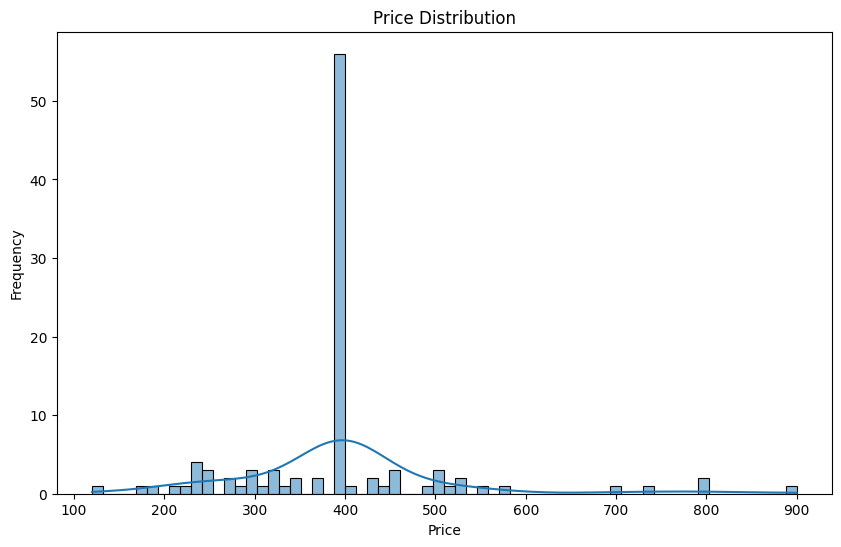

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'Price' column
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


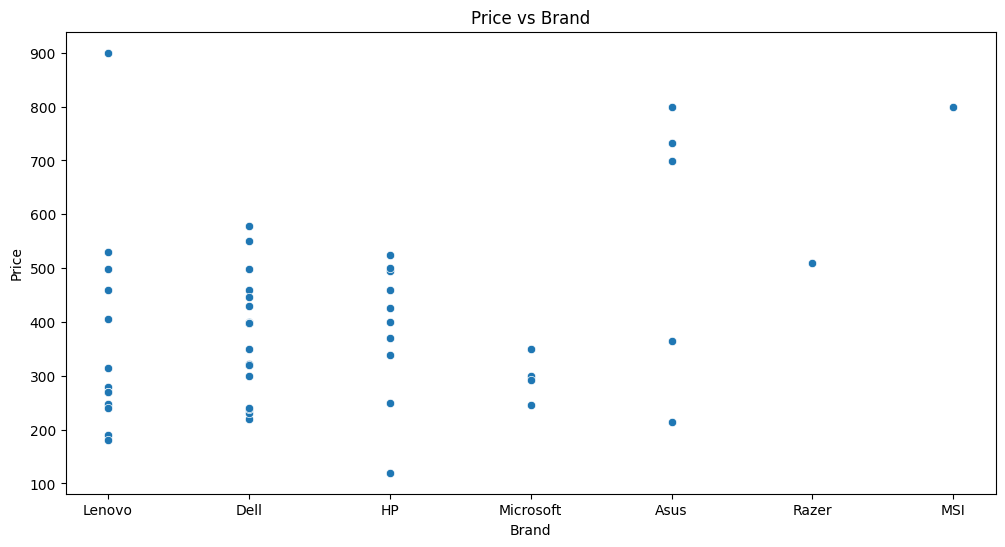

In [6]:
# Scatter plot of Price vs Brand
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Brand', y='Price')
plt.title('Price vs Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Select features and target
X = df[['Brand', 'Processor', 'CONDITION']]  # independent variables
y = df['Price']  # dependent variable

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [8]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [9]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compare predicted values with actual values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


      Actual   Predicted
26  119.9900  292.637007
61  397.4796  400.237383
2   369.9500  389.986603
62  397.4796  400.237383
85  397.4796  400.237383


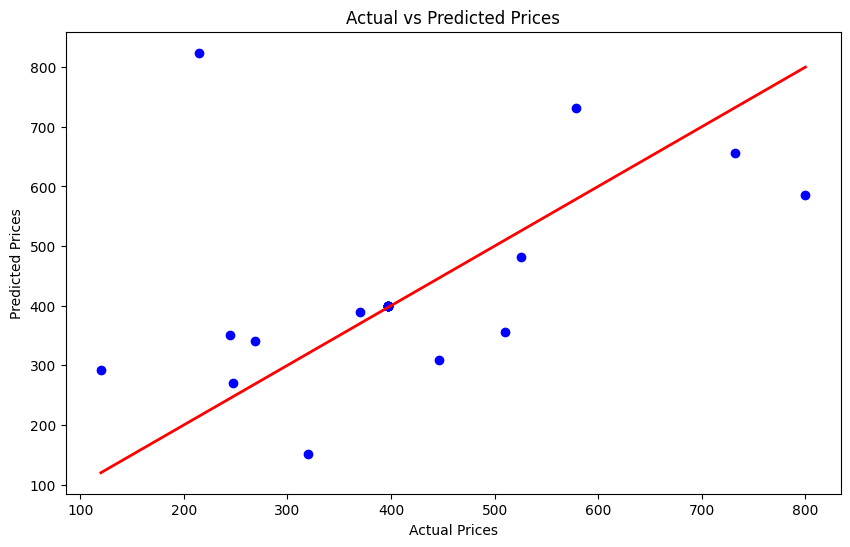

In [10]:
# Plot predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
